In [156]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

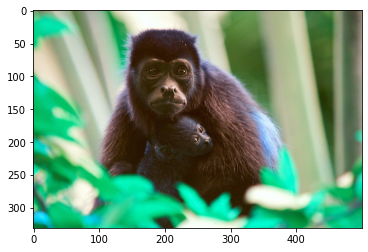

In [157]:
DATADIR="C:/Users/Abolfazl/Desktop/10 Monkey space/Dataset"
CATEGORIES=["alouatta_palliata","erythrocebus_patas","cacajao_calvus"," macaca_fuscata","cebuella_pygmea","cebus_capucinus","mico_argentatus","saimiri_sciureus","aotus_nigriceps","trachypithecus_johnii"]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(img_array,)
        plt.show()
        break
    break

In [158]:
batch_size = 32
IMG_SIZE = 180

In [159]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_SIZE,IMG_SIZE),
  batch_size=batch_size)

Found 1301 files belonging to 10 classes.
Using 1041 files for training.


In [160]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATADIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_SIZE,IMG_SIZE),
  batch_size=batch_size)

Found 1301 files belonging to 10 classes.
Using 260 files for validation.


In [161]:
class_names = train_ds.class_names
print(class_names)

['alouatta_palliata', 'aotus_nigriceps', 'cacajao_calvus', 'cebuella_pygmea', 'cebus_capucinus', 'erythrocebus_patas', 'macaca_fuscata', 'mico_argentatus', 'saimiri_sciureus', 'trachypithecus_johnii']


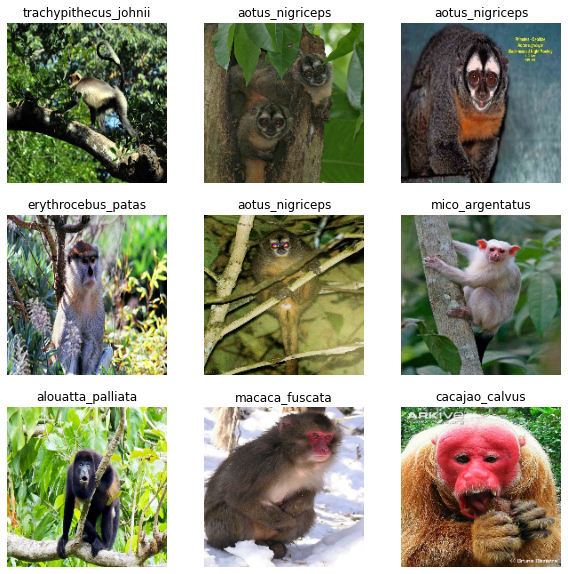

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [163]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [164]:
#resize_and_rescale = tf.keras.Sequential([
#  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
#  layers.experimental.preprocessing.Rescaling(1./255)
#])

In [169]:
num_classes = 10

model = Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE,input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_SIZE,IMG_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [170]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [171]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_1 (Resizing)        (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_19 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 45, 45, 64)      

In [172]:
epochs=13
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/13
33/33 [==============================] - 27s 702ms/step - loss: 2.5096 - accuracy: 0.0960 - val_loss: 2.2762 - val_accuracy: 0.1154
Epoch 2/13
33/33 [==============================] - 26s 700ms/step - loss: 2.1841 - accuracy: 0.1765 - val_loss: 1.9714 - val_accuracy: 0.2500
Epoch 3/13
33/33 [==============================] - 27s 709ms/step - loss: 1.6606 - accuracy: 0.4555 - val_loss: 1.6210 - val_accuracy: 0.4808
Epoch 4/13
33/33 [==============================] - 27s 706ms/step - loss: 1.3017 - accuracy: 0.5830 - val_loss: 1.3097 - val_accuracy: 0.5500
Epoch 5/13
33/33 [==============================] - 27s 705ms/step - loss: 0.9468 - accuracy: 0.6959 - val_loss: 1.2125 - val_accuracy: 0.5654
Epoch 6/13
33/33 [==============================] - 27s 709ms/step - loss: 0.6752 - accuracy: 0.7728 - val_loss: 1.1389 - val_accuracy: 0.6462
Epoch 7/13
33/33 [==============================] - 27s 715ms/step - loss: 0.3611 - accuracy: 0.8862 - val_loss: 1.1576 - val_accuracy: 0.6577

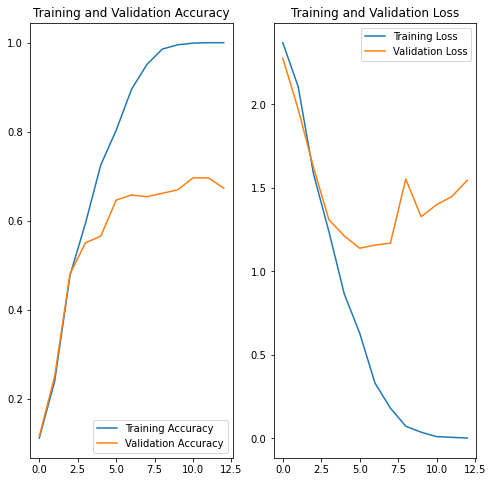

In [173]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [174]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(IMG_SIZE, 
                                                              IMG_SIZE,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2),
    #layers.experimental.preprocessing.RandomWidth(0.2),
    #layers.experimental.preprocessing.RandomHeight(0.2)
  ]
)

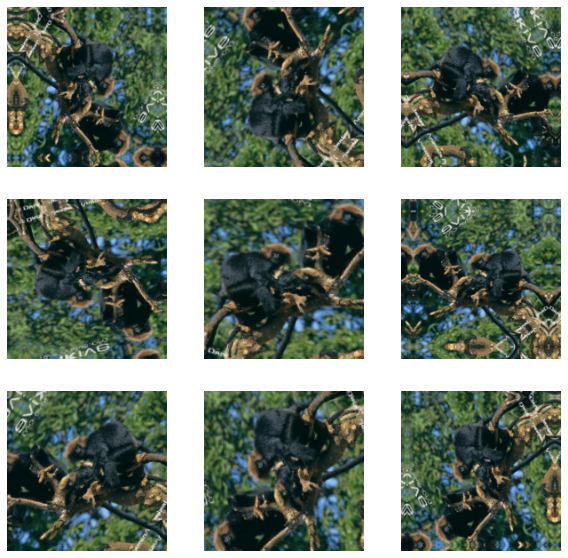

In [175]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [180]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE,input_shape=(IMG_SIZE,IMG_SIZE,3)),
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_SIZE,IMG_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [181]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [182]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_22 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
resizing_4 (Resizing)        (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_22 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 45, 45, 32)      

In [183]:
epochs =35
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/35
33/33 [==============================] - 38s 1s/step - loss: 2.5752 - accuracy: 0.1161 - val_loss: 2.1239 - val_accuracy: 0.2538
Epoch 2/35
33/33 [==============================] - 32s 759ms/step - loss: 2.1110 - accuracy: 0.2077 - val_loss: 1.8090 - val_accuracy: 0.3385
Epoch 3/35
33/33 [==============================] - 32s 861ms/step - loss: 1.7736 - accuracy: 0.3406 - val_loss: 1.6650 - val_accuracy: 0.4115
Epoch 4/35
33/33 [==============================] - 38s 1s/step - loss: 1.5349 - accuracy: 0.4427 - val_loss: 1.5010 - val_accuracy: 0.4769
Epoch 5/35
33/33 [==============================] - 33s 911ms/step - loss: 1.4320 - accuracy: 0.4781 - val_loss: 1.4624 - val_accuracy: 0.4808
Epoch 6/35
33/33 [==============================] - 41s 1s/step - loss: 1.3450 - accuracy: 0.5068 - val_loss: 1.4063 - val_accuracy: 0.4885
Epoch 7/35
33/33 [==============================] - 41s 1s/step - loss: 1.2814 - accuracy: 0.5342 - val_loss: 1.4943 - val_accuracy: 0.4692
Epoch 8/35


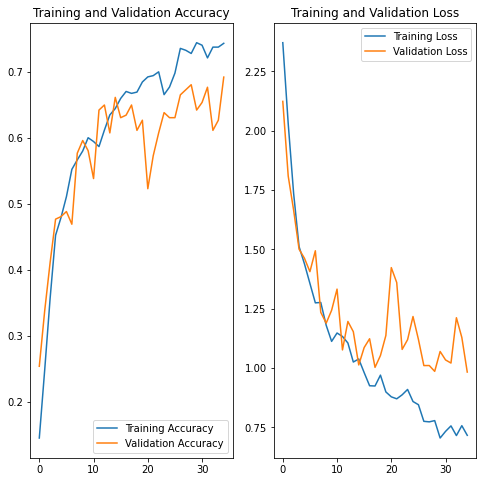

In [184]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [188]:
testdata="C:/Users/Abolfazl/Desktop/10 Monkey space/test/n0016.jpg"


img = keras.preprocessing.image.load_img(
    testdata, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to:* {} * with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to:* cebus_capucinus * with a 35.00 percent confidence.
